**Name : Sk. Zayed Mahmood** **Student ID : 22121116**

# **Project Title : Credit Card Customer Segmentation**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing all the necessary Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

**Loading the Dataset**

In [5]:
data = pd.read_csv("/content/drive/MyDrive/EEE474_Project/Credit Card User Dataset.csv")

**Observing the Data**

In [6]:
print('Data shape: ' + str(data.shape))
data.head(10)

Data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Describing the Data**

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Data Processing**

**Check for Null values**

In [8]:
print("Null values in the dataset :")
data.isnull().sum()

Null values in the dataset :


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Impute Null values with Median**

In [9]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

**Check for Null values after replacing with Median**

In [10]:
print("Null values in the dataset :")
data.isnull().sum()

Null values in the dataset :


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Check for Categorical Values**

In [11]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) == 0:
    print("Categorical columns in the dataset: 0")
else:
    print("Categorical columns in the dataset:")
    print(categorical_columns)

Categorical columns in the dataset:
Index(['CUST_ID'], dtype='object')


**Drop Cust ID column**

In [12]:
data = data.drop('CUST_ID', axis=1)

**Normalize the Dataset**

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

data_imputed = pd.DataFrame(data_scaled,columns=data.columns)

**Observing Correlation Among Features**

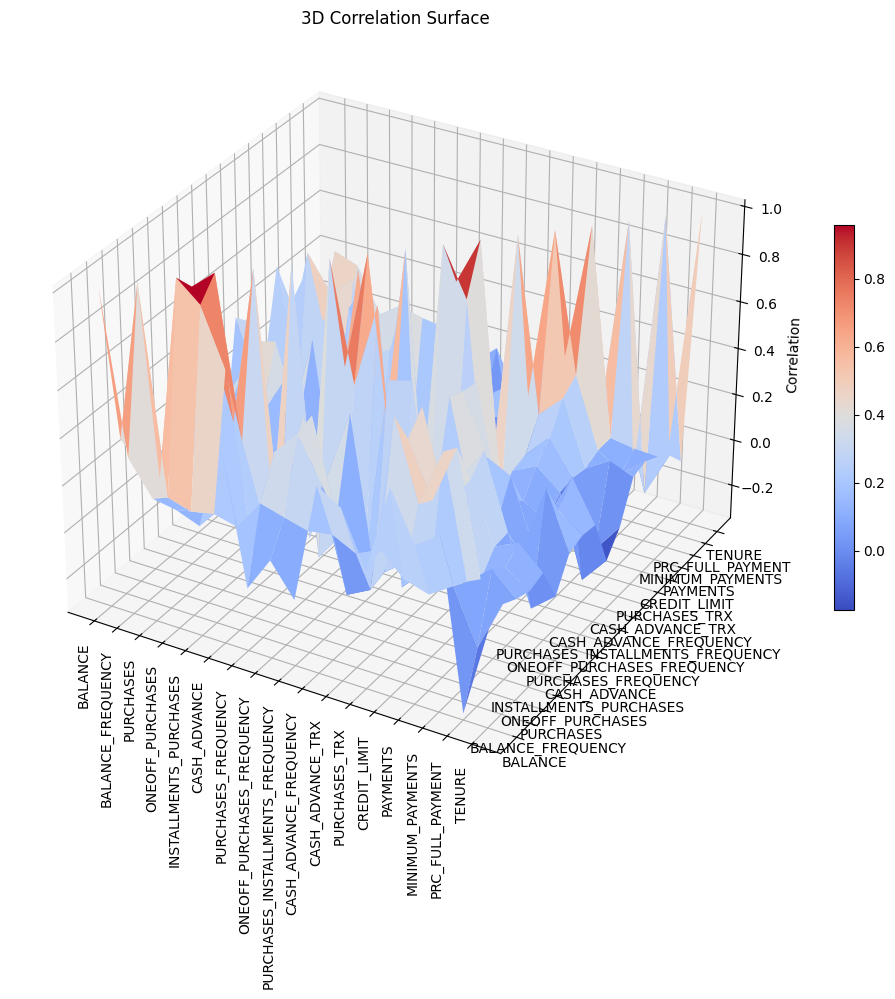

In [14]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(data_imputed.columns))
y = np.arange(len(data_imputed.columns))
X, Y = np.meshgrid(x, y)
Z = data_imputed.corr().values

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(data_imputed.columns, rotation=90)
ax.set_yticklabels(data_imputed.columns)
ax.set_zlabel('Correlation')
plt.title('3D Correlation Surface')
fig.colorbar(surf, shrink=0.5)
plt.show()

#**Clustering**

**K-Means**

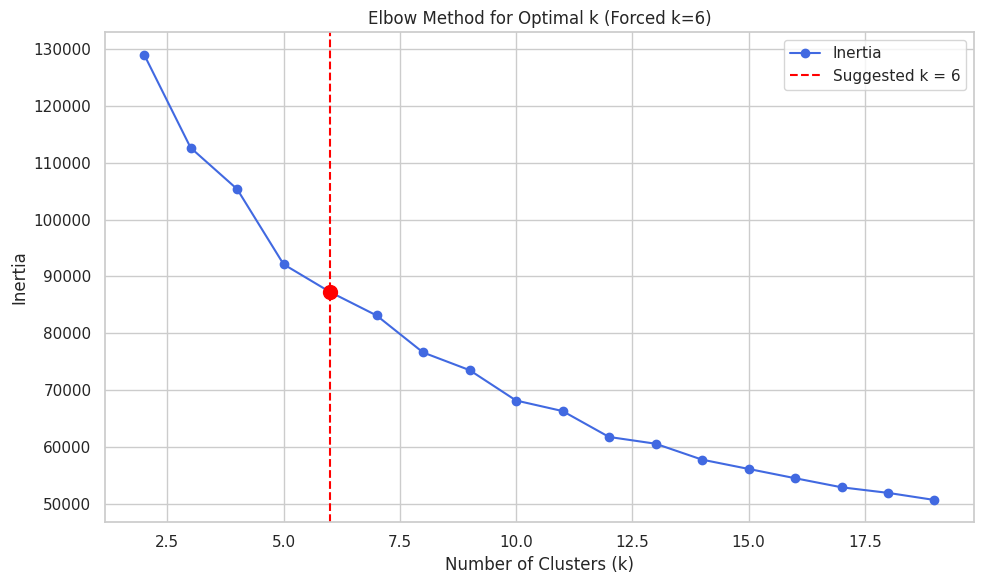

Suggested number of clusters: 6


In [15]:
def plot_kmeans_elbow(X, start=2, stop=20, fixed_k=6):
    inertias = []
    k_range = range(start, stop)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    plt.plot(k_range, inertias, 'o-', color='royalblue', label='Inertia')


    plt.axvline(fixed_k, color='red', linestyle='--', label=f'Suggested k = {fixed_k}')
    plt.scatter(fixed_k, inertias[fixed_k - start], color='red', s=100, zorder=5)

    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k (Forced k=6)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Suggested number of clusters: {fixed_k}")

plot_kmeans_elbow(data_imputed, fixed_k=6)

**Silhouette Scores and Plotting**

k = 2 | Silhouette Score = 0.2795
k = 3 | Silhouette Score = 0.2067
k = 4 | Silhouette Score = 0.1665
k = 5 | Silhouette Score = 0.1926
k = 6 | Silhouette Score = 0.1923


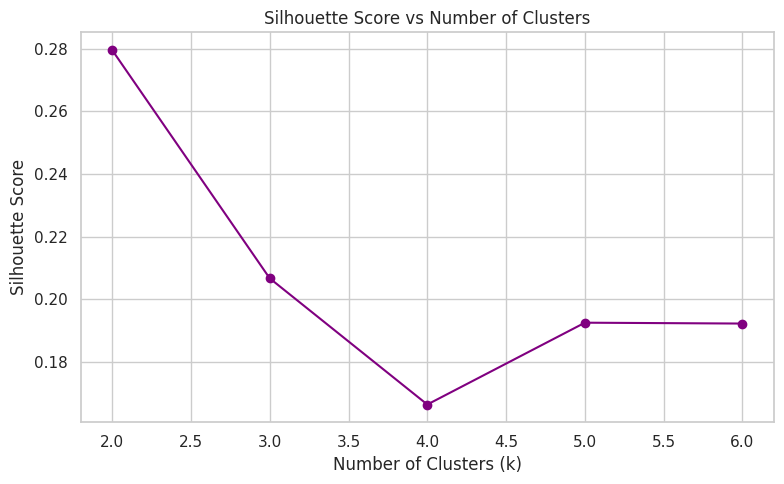

In [16]:
def plot_silhouette_summary(X, cluster_range=range(2, 11), metric='euclidean'):
    silhouette_scores = []

    for k in cluster_range:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels, metric=metric)
        silhouette_scores.append(score)
        print(f"k = {k} | Silhouette Score = {score:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='purple')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs Number of Clusters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_silhouette_summary(data_imputed, cluster_range=range(2, 7))

**Davies-Bouldin Index and Plotting**

k = 2 | Davies-Bouldin Index = 1.8009
k = 3 | Davies-Bouldin Index = 1.6594
k = 4 | Davies-Bouldin Index = 1.5721
k = 5 | Davies-Bouldin Index = 1.4682
k = 6 | Davies-Bouldin Index = 1.5926
k = 7 | Davies-Bouldin Index = 1.4353
k = 8 | Davies-Bouldin Index = 1.4573
k = 9 | Davies-Bouldin Index = 1.5479
k = 10 | Davies-Bouldin Index = 1.4215


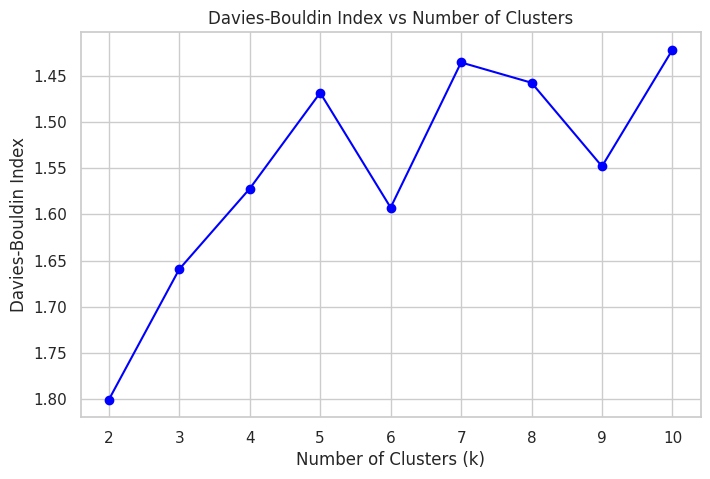

In [17]:
def plot_davies_bouldin(X, cluster_range=range(2, 11)):
    dbi_scores = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        dbi = davies_bouldin_score(X, labels)
        dbi_scores.append(dbi)
        print(f"k = {k} | Davies-Bouldin Index = {dbi:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, dbi_scores, marker='o', linestyle='-', color='blue')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Index")
    plt.title("Davies-Bouldin Index vs Number of Clusters")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

plot_davies_bouldin(data_imputed)

**Calinski-Harabasz Index and Plotting**

k = 2 | Calinski-Harabasz Index = 1609.61
k = 3 | Calinski-Harabasz Index = 1571.48
k = 4 | Calinski-Harabasz Index = 1325.13
k = 5 | Calinski-Harabasz Index = 1456.79
k = 6 | Calinski-Harabasz Index = 1329.99
k = 7 | Calinski-Harabasz Index = 1236.73
k = 8 | Calinski-Harabasz Index = 1258.09
k = 9 | Calinski-Harabasz Index = 1194.22
k = 10 | Calinski-Harabasz Index = 1222.05


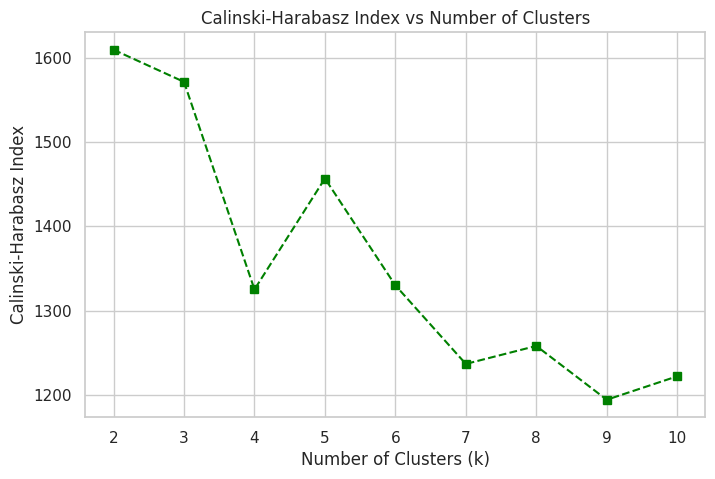

In [18]:
def plot_calinski_harabasz(X, cluster_range=range(2, 11)):
    chi_scores = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        chi = calinski_harabasz_score(X, labels)
        chi_scores.append(chi)
        print(f"k = {k} | Calinski-Harabasz Index = {chi:.2f}")

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, chi_scores, marker='s', linestyle='--', color='green')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Calinski-Harabasz Index")
    plt.title("Calinski-Harabasz Index vs Number of Clusters")
    plt.grid(True)
    plt.show()

plot_calinski_harabasz(data_imputed)

#**Feature Extraction with PCA**

**Evaluation of different metrics to Determine the number of cluster**

In [17]:
def evaluate_pca_clustering(X, pca_components=range(2, 5), cluster_range=range(2, 7)):
    results = []

    for n_components in pca_components:
        pca = PCA(n_components=n_components, random_state=42)
        X_pca = pca.fit_transform(X)

        for k in cluster_range:
            model = KMeans(n_clusters=k, random_state=42)
            labels = model.fit_predict(X_pca)

            silhouette = silhouette_score(X_pca, labels)
            davies = davies_bouldin_score(X_pca, labels)
            calinski = calinski_harabasz_score(X_pca, labels)
            inertia = model.inertia_

            results.append({
                'PCA Components': n_components,
                'Clusters': k,
                'Silhouette Score': round(silhouette, 4),
                'Davies-Bouldin Score': round(davies, 4),
                'Calinski-Harabasz Score': round(calinski, 2),
                'Inertia': round(inertia, 2)
            })

    df_results = pd.DataFrame(results)
    print(df_results)


evaluate_pca_clustering(data_imputed, pca_components=range(2, 5), cluster_range=range(2, 7))


    PCA Components  Clusters  Silhouette Score  Davies-Bouldin Score  \
0                2         2            0.4624                1.0029   
1                2         3            0.4488                0.8174   
2                2         4            0.4074                0.8006   
3                2         5            0.3982                0.7937   
4                2         6            0.3857                0.8001   
5                3         2            0.4069                1.1719   
6                3         3            0.3798                0.9724   
7                3         4            0.3697                0.9167   
8                3         5            0.3683                0.8568   
9                3         6            0.3294                0.8951   
10               4         2            0.3709                1.2870   
11               4         3            0.3146                1.1451   
12               4         4            0.3224                1.

**KMeans clustering Visualisation**

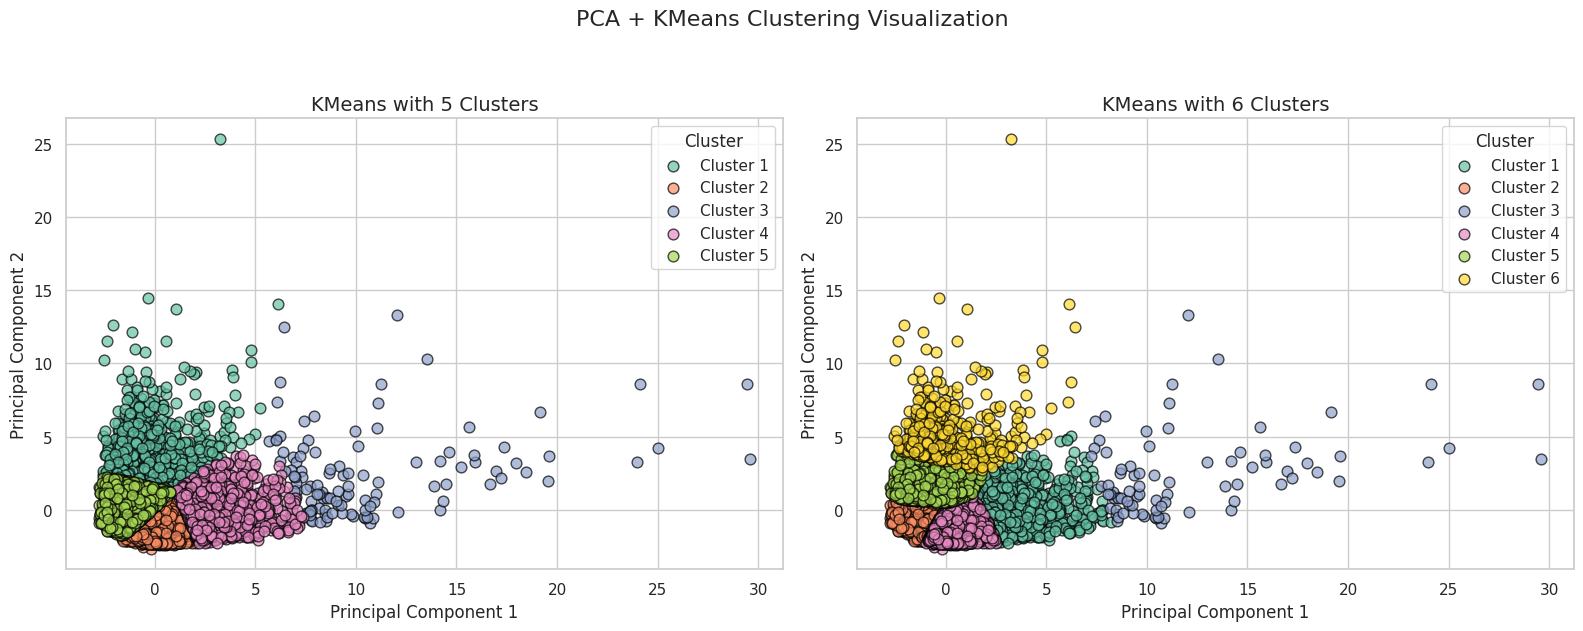

In [18]:
def plot_pca_clusters(data, cluster_counts=[5, 6], figsize=(16, 6), colors=None):
    sns.set(style="whitegrid")

    if colors is None:
        colors = sns.color_palette("Set2", max(cluster_counts))

    fig, axes = plt.subplots(1, len(cluster_counts), figsize=figsize)

    for idx, n_clusters in enumerate(cluster_counts):

        pca = PCA(n_components=2, random_state=42)
        data_pca = pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])


        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data_pca)
        data_pca['Cluster'] = labels


        ax = axes[idx]
        for cluster in range(n_clusters):
            cluster_data = data_pca[data_pca['Cluster'] == cluster]
            ax.scatter(cluster_data['PC1'], cluster_data['PC2'],
                       color=colors[cluster],
                       label=f'Cluster {cluster + 1}',
                       alpha=0.7,
                       edgecolor='black',
                       s=60)
        ax.set_title(f'KMeans with {n_clusters} Clusters', fontsize=14)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend(title='Cluster', loc='best')

    plt.suptitle('PCA + KMeans Clustering Visualization', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


plot_pca_clusters(data_imputed, cluster_counts=[5, 6])

**Agglomerative Hierarchical Clustering with PCA**

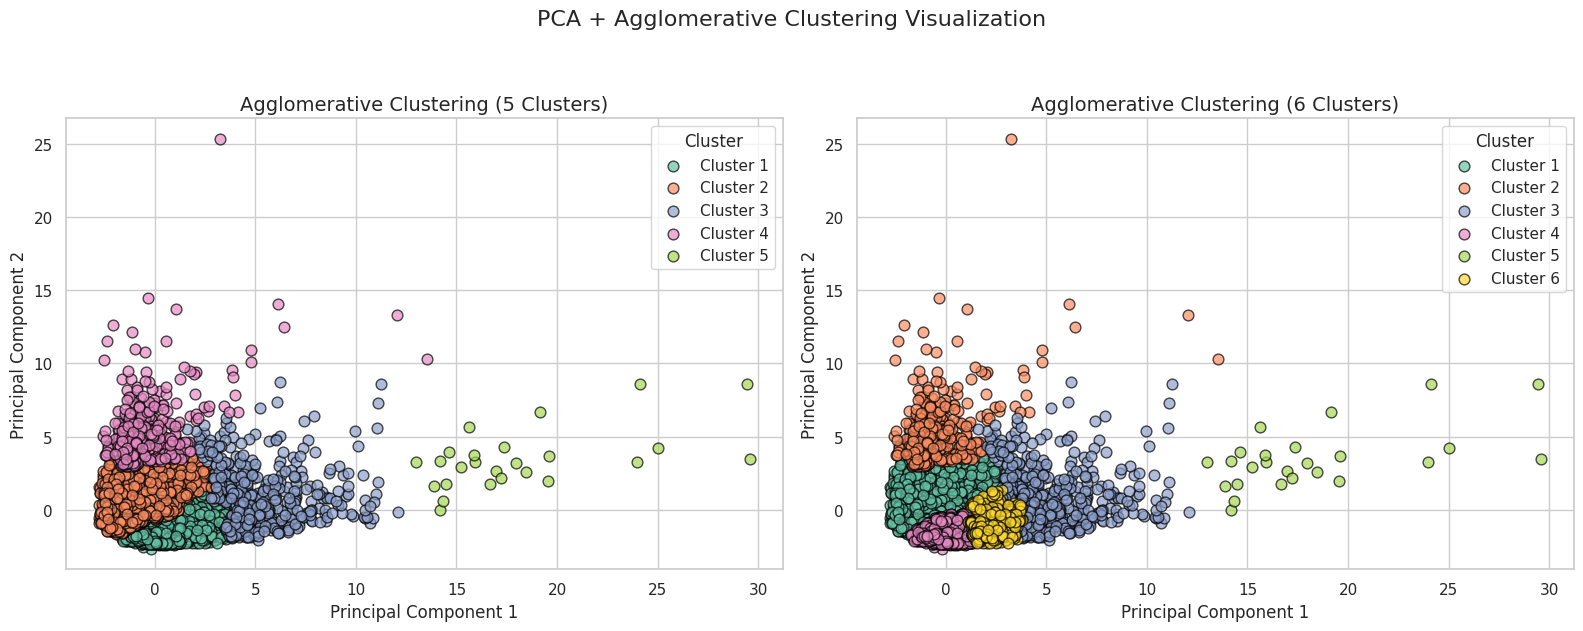

In [19]:
def plot_agglomerative_clusters(data, cluster_counts=[5, 6], figsize=(16, 6), colors=None):
    sns.set(style="whitegrid")

    if colors is None:
        colors = sns.color_palette("Set2", max(cluster_counts))

    fig, axes = plt.subplots(1, len(cluster_counts), figsize=figsize)

    for idx, n_clusters in enumerate(cluster_counts):

        pca = PCA(n_components=2, random_state=42)
        data_pca = pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])


        agg = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg.fit_predict(data_pca)
        data_pca['Cluster'] = labels


        ax = axes[idx]
        for cluster in range(n_clusters):
            cluster_data = data_pca[data_pca['Cluster'] == cluster]
            ax.scatter(cluster_data['PC1'], cluster_data['PC2'],
                       color=colors[cluster],
                       label=f'Cluster {cluster + 1}',
                       alpha=0.7,
                       edgecolor='black',
                       s=60)
        ax.set_title(f'Agglomerative Clustering ({n_clusters} Clusters)', fontsize=14)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend(title='Cluster', loc='best')

    plt.suptitle('PCA + Agglomerative Clustering Visualization', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

plot_agglomerative_clusters(data_imputed, cluster_counts=[5, 6])

**Gaussian Mixture Clustering with PCA**

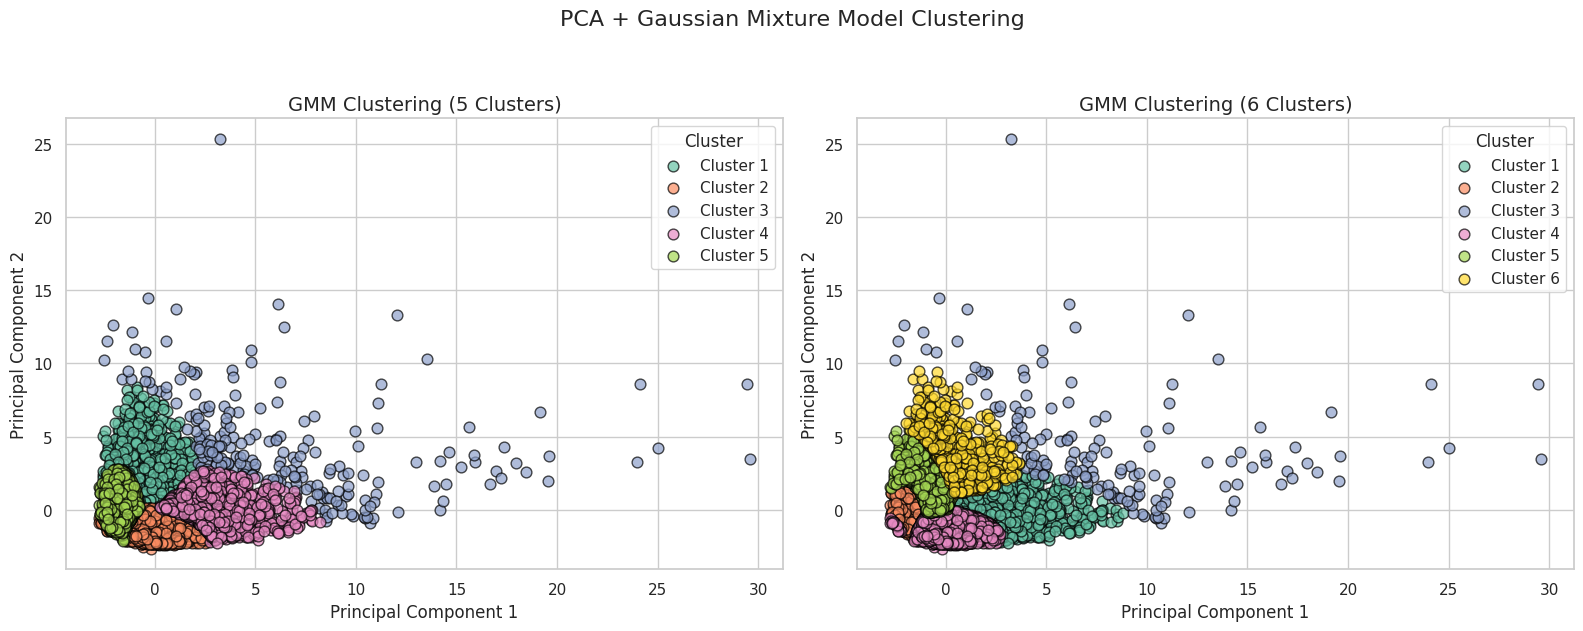

In [20]:
def plot_gmm_clusters(data, cluster_counts=[5, 6], figsize=(16, 6), colors=None):
    sns.set(style="whitegrid")

    if colors is None:
        colors = sns.color_palette("Set2", max(cluster_counts))

    fig, axes = plt.subplots(1, len(cluster_counts), figsize=figsize)

    for idx, n_clusters in enumerate(cluster_counts):

        pca = PCA(n_components=2, random_state=42)
        data_pca = pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])


        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = gmm.fit_predict(data_pca)
        data_pca['Cluster'] = labels


        ax = axes[idx]
        for cluster in range(n_clusters):
            cluster_data = data_pca[data_pca['Cluster'] == cluster]
            ax.scatter(cluster_data['PC1'], cluster_data['PC2'],
                       color=colors[cluster],
                       label=f'Cluster {cluster + 1}',
                       alpha=0.7,
                       edgecolor='black',
                       s=60)
        ax.set_title(f'GMM Clustering ({n_clusters} Clusters)', fontsize=14)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend(title='Cluster', loc='best')

    plt.suptitle('PCA + Gaussian Mixture Model Clustering', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

plot_gmm_clusters(data_imputed, cluster_counts=[5, 6])

# **Exploratory Data Analysis**

**KMeans Cluster Analysis**

New DataFrame created with selected columns. Shape: (8950, 6)
Clustering completed and cluster labels added to the DataFrame.


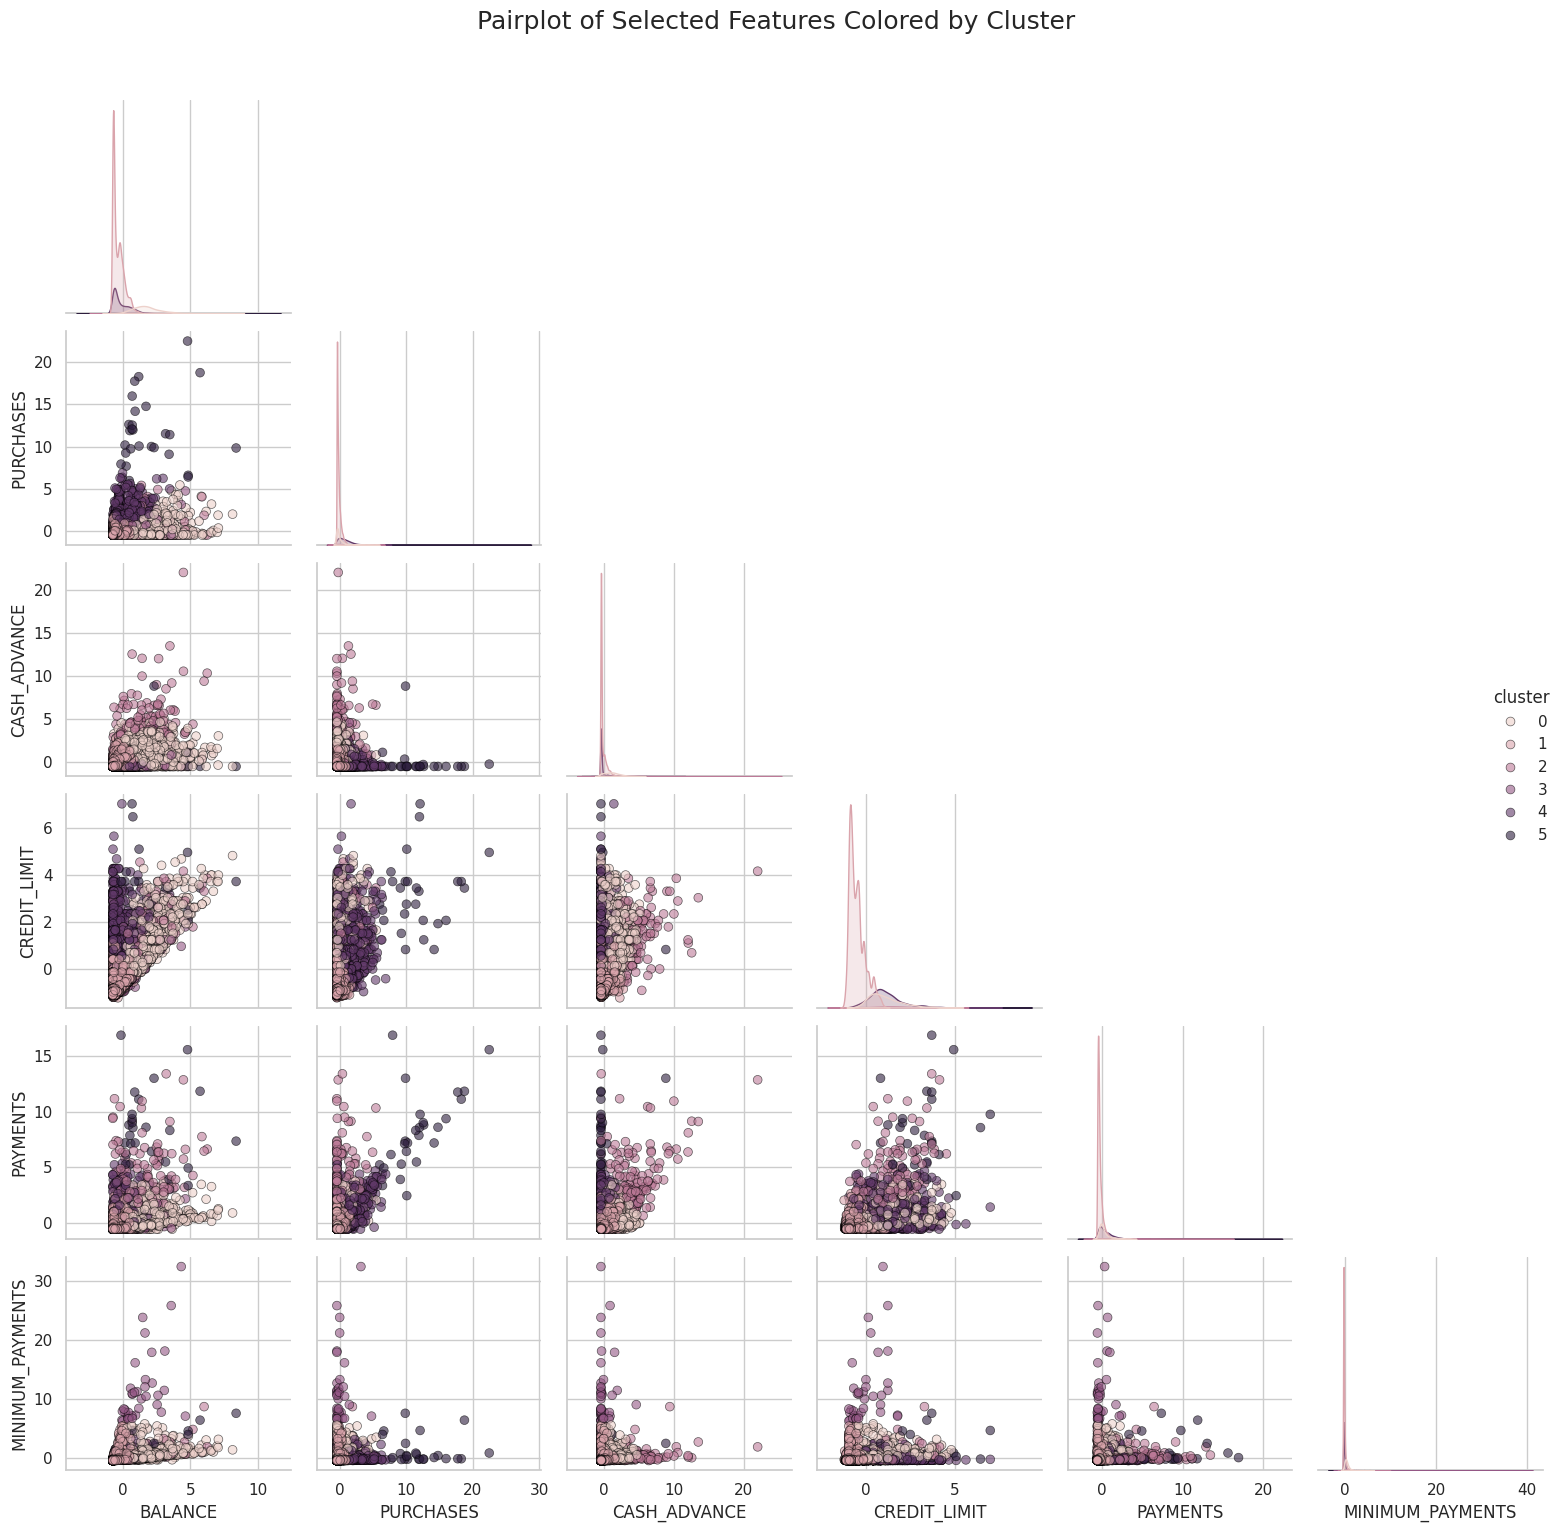

In [21]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]


data_final = pd.DataFrame(data_imputed[best_cols])
print(f'New DataFrame created with selected columns. Shape: {data_final.shape}')

kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(data_final)

data_final['cluster'] = labels
print('Clustering completed and cluster labels added to the DataFrame.')

cols_for_plot = ['cluster'] + best_cols


sns.set(style='whitegrid', context='notebook', palette='Set2')

pairplot = sns.pairplot(
    data_final[cols_for_plot],
    hue='cluster',
    diag_kind='kde',
    corner=True,
    plot_kws={
        'alpha': 0.6,
        's': 40,
        'edgecolor': 'black',
        'linewidth': 0.5
    }
)


pairplot.fig.suptitle('Pairplot of Selected Features Colored by Cluster', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


#**Customer Segmentation**

1. **Cluster 0: Average User**
2. **Cluster 1: Active User**
3. **Cluster 2: High Amount Spenders**
4. **Cluster 3: Frequent Loaners**
5. **Cluster 4: High Risk Takers**
6. **Cluster 5: Unpredctible User Behaviour**



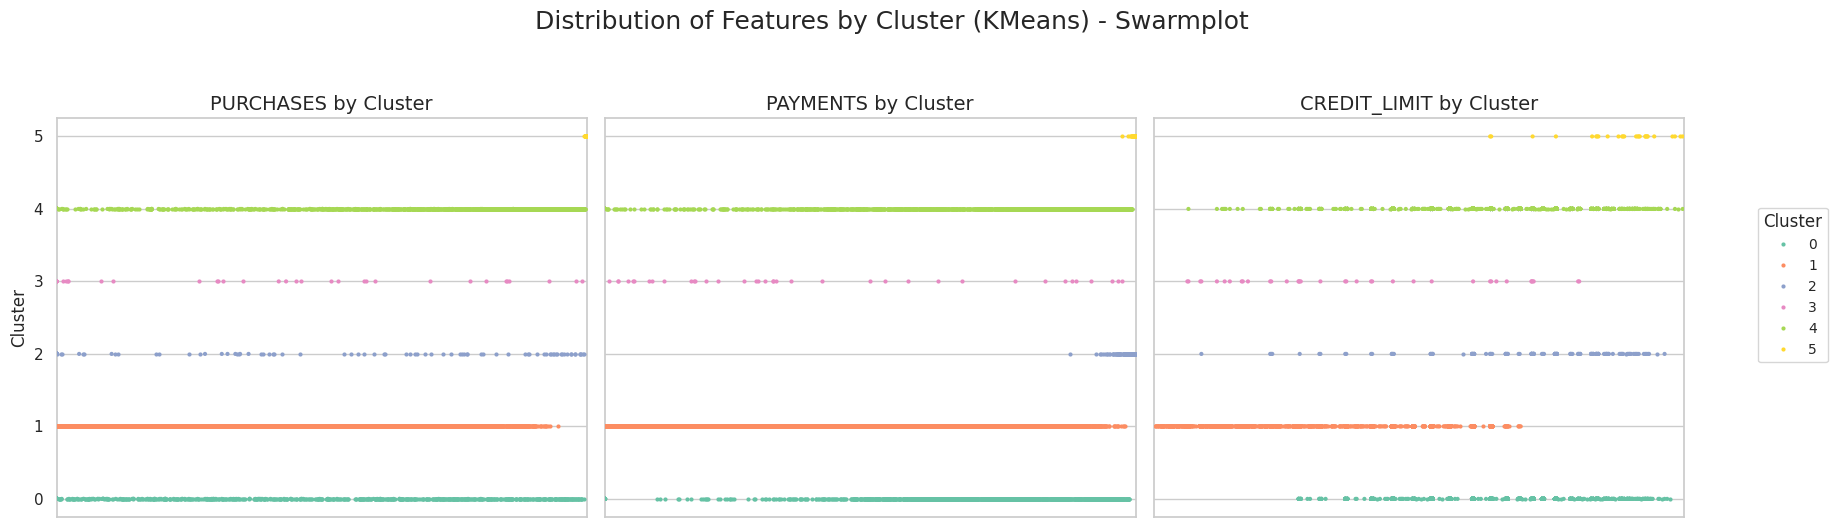

In [37]:
x_vars = ['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT']

sns.set(style='whitegrid', context='notebook', palette='Set2')

fig, axes = plt.subplots(1, len(x_vars), figsize=(18, 5), sharey=True)

for i, feature in enumerate(x_vars):
    sns.swarmplot(
        data=data_final,
        y='cluster',
        x=feature,
        ax=axes[i],
        hue='cluster',
        palette='Set2',
        size=3,
        dodge=False
    )
    axes[i].set_title(f'{feature} by Cluster', fontsize=14)
    axes[i].set_ylabel('Cluster' if i == 0 else '', fontsize=12)

    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    axes[i].legend_.remove()

handles, labels = axes[-1].get_legend_handles_labels()

fig.legend(handles, labels, title='Cluster', loc='center right', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)

plt.suptitle('Distribution of Features by Cluster (KMeans) - Swarmplot', fontsize=18, y=1.05)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space on the right for legend
plt.show()

**Cluster 2 Exploration**

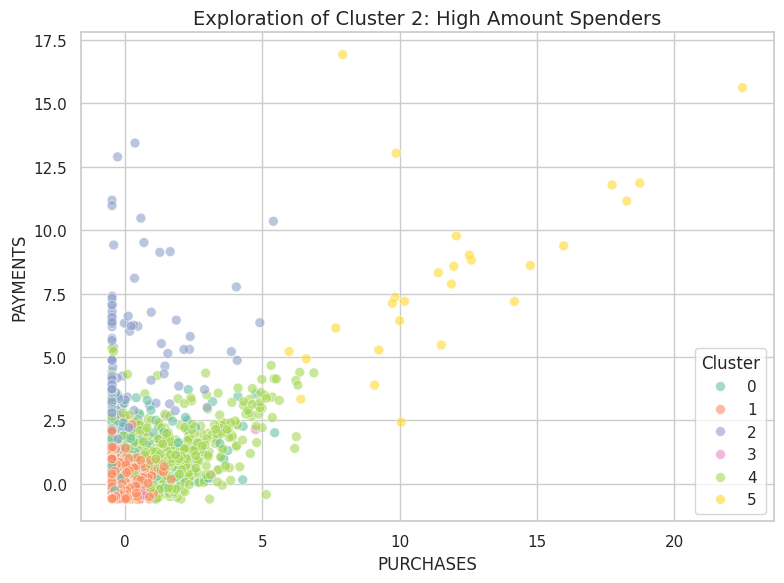

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_final,
    x='PURCHASES',
    y='PAYMENTS',
    hue='cluster',
    palette='Set2',
    alpha=0.6,
    s=50
)
plt.title("Exploration of Cluster 2: High Amount Spenders", fontsize=14)
plt.xlabel("PURCHASES")
plt.ylabel("PAYMENTS")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

**Cluster 3 Exploration**

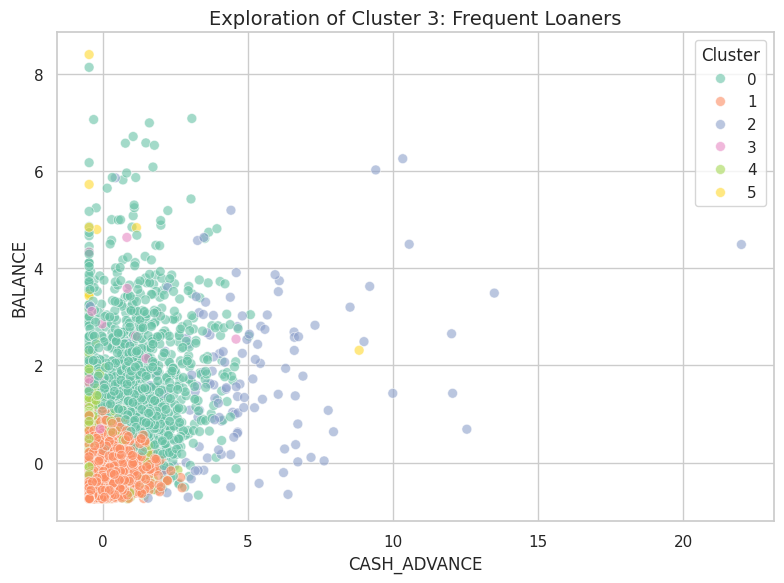

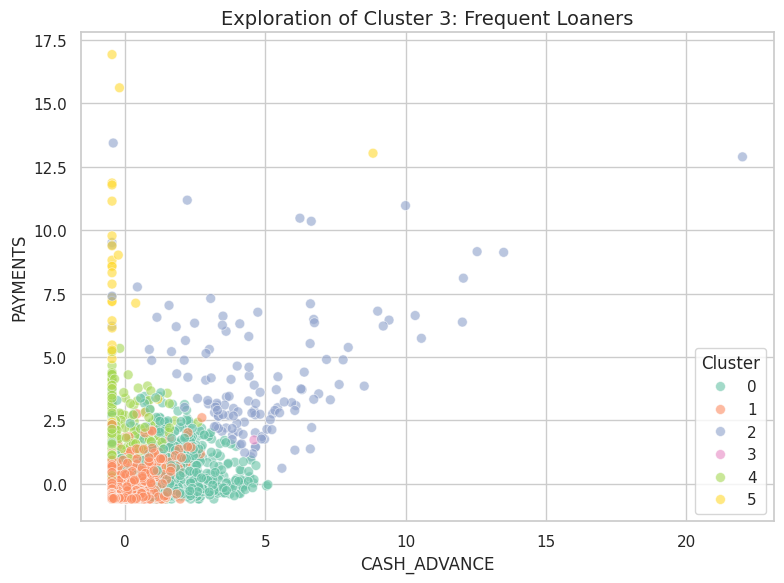

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_final,
    x='CASH_ADVANCE',
    y='BALANCE',
    hue='cluster',
    palette='Set2',
    alpha=0.6,
    s=50
)
plt.title("Exploration of Cluster 3: Frequent Loaners", fontsize=14)
plt.xlabel("CASH_ADVANCE")
plt.ylabel("BALANCE")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_final,
    x='CASH_ADVANCE',
    y='PAYMENTS',
    hue='cluster',
    palette='Set2',
    alpha=0.6,
    s=50
)
plt.title("Exploration of Cluster 3: Frequent Loaners", fontsize=14)
plt.xlabel("CASH_ADVANCE")
plt.ylabel("PAYMENTS")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**Cluster 4 Exploration**

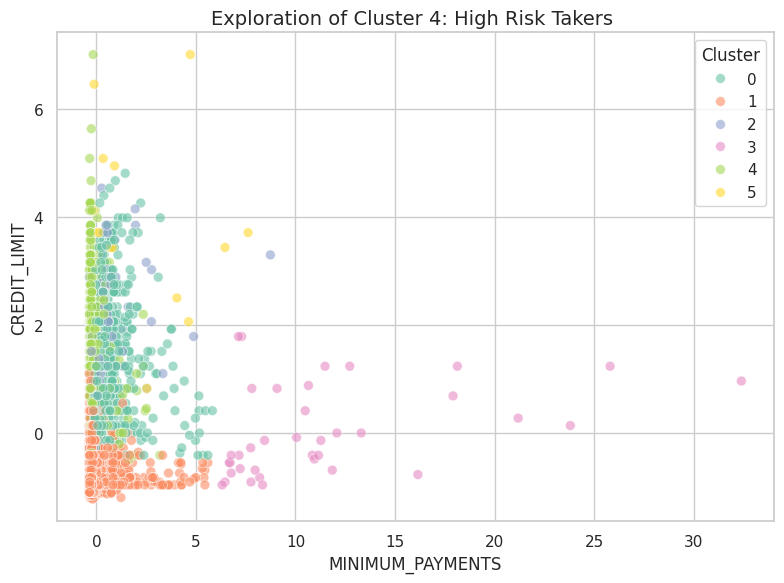

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_final,
    x='MINIMUM_PAYMENTS',
    y='CREDIT_LIMIT',
    hue='cluster',
    palette='Set2',
    alpha=0.6,
    s=50
)
plt.title("Exploration of Cluster 4: High Risk Takers ", fontsize=14)
plt.xlabel("MINIMUM_PAYMENTS")
plt.ylabel("CREDIT_LIMIT")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

**Cluster 5 Exploration**

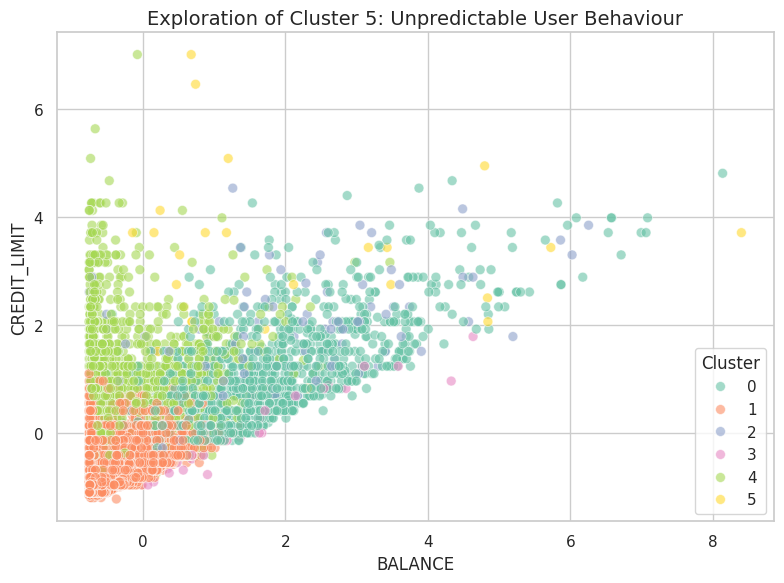

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_final,
    x='BALANCE',
    y='CREDIT_LIMIT',
    hue='cluster',
    palette='Set2',
    alpha=0.6,
    s=50
)
plt.title("Exploration of Cluster 5: Unpredictable User Behaviour", fontsize=14)
plt.xlabel("BALANCE")
plt.ylabel("CREDIT_LIMIT")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()